<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Machine Learning Foundation

## Course 5, Part d: Keras Intro LAB


## Using Keras to Build and Train Neural Networks


In this exercise we will use a neural network to predict diabetes using the Pima Diabetes Dataset.  We will start by training a Random Forest to get a performance baseline.  Then we will use the Keras package to quickly build and train a neural network and compare the performance.  We will see how different network structures affect the performance, training time, and level of overfitting (or underfitting).

## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)


The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.


In [2]:
# url = "https://raw.githubusercontent.com/htetaunglynn94/coursera/refs/heads/main/ibm_ml_series/dl_and_rl/module_2/diabetes.csv"
# import pandas as pd
# df = pd.read_csv(url)
# df.head()

In [1]:
!pip install skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.9 MB/s eta 0:00:00


In [3]:
import warnings
warnings.filterwarnings("ignore")
import skillsnetwork

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Import Keras objects for Deep Learning
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [4]:
def save_model_history(mdl, mdl_name, hist, hist_name):
    mdl.save(mdl_name)
    with open(hist_name, "w") as f:
        json.dump(hist.history, f)
    files.download(mdl_name)
    files.download(hist_name)

def load_model_history(mdl_id, hist_id, mdl_name, hist_name):


    model_url = "https://drive.google.com/uc?id=" + mdl_id
    history_url = "https://drive.google.com/uc?id=" + hist_id


    gdown.download(model_url, mdl_name, quiet=True)
    gdown.download(history_url, hist_name, quiet=True)

    # Load model
    model = models.load_model(mdl_name)

    # Load result
    with open(hist_name, "r") as f:
        history = json.load(f)

    return model, history

In [5]:
## Load in the data set
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module2/L2/diabetes.csv", overwrite=True)

names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv('./diabetes.csv', names=names, header=0)
diabetes_df.head()

Saved to '.'


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# # Load data set
# diabetes_df = pd.read_csv(url)
# diabetes_df.head()

In [7]:
# Take a peek at the data -- if there are lots of "NaN" you may have internet connectivity issues
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
538,0,127,80,37,210,36.3,0.804,23,0
58,0,146,82,0,0,40.5,1.781,44,0
738,2,99,60,17,160,36.6,0.453,21,0
393,4,116,72,12,87,22.1,0.463,37,0
44,7,159,64,0,0,27.4,0.294,40,0


In [8]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df.iloc[:, -1].values # or df.iloc[:, [-1]].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [10]:
# 'y' includes boolean values (binary)
np.mean(y), np.mean(1-y), 1 - np.mean(y)

(np.float64(0.3489583333333333),
 np.float64(0.6510416666666666),
 np.float64(0.6510416666666667))

Above, we see that about 35% of the patients in this dataset have diabetes, while 65% do not.  This means we can get an accuracy of 65% without any model - just declare that no one has diabetes. We will calculate the ROC-AUC score to evaluate performance of our model, and also look at the accuracy as well to see if we improved upon the 65% accuracy.
## Exercise 1: Get a baseline performance using Random Forest
To begin, and get a baseline for classifier performance:
1. Train a Random Forest model with 200 trees on the training data.
2. Calculate the accuracy and roc_auc_score of the predictions.


**1. Train RF Model**

In [11]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [12]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)
print("accuracy is {:.3f}".format(accuracy_score(y_test, y_pred_class_rf))) # model accuracy
print("roc-auc is {:.3f}".format(roc_auc_score(y_test, y_pred_prob_rf[:, 0]))) # predict class 0 as positive
print("roc-auc is {:.3f}".format(roc_auc_score(y_test, y_pred_prob_rf[:, 1]))) # predict class 1 as positive

accuracy is 0.766
roc-auc is 0.174
roc-auc is 0.826


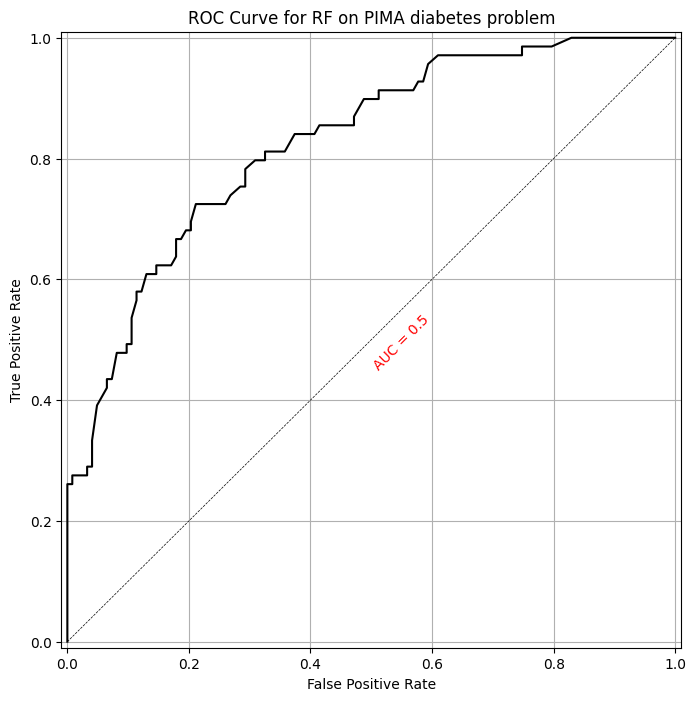

In [13]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    # fpr = false positive rate
    # tpr = true positive rate
    # thr = threshold value
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0,1], [0,1], 'k--', lw=0.5) # roc curve for random model
    plt.text(0.5, 0.45, "AUC = 0.5", rotation=45, color='r')
    ax.grid(True)
    ax.set(title = 'ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlabel = "False Positive Rate",
           ylabel = "True Positive Rate",           xlim = [-0.01, 1.01],
           ylim = [-0.01, 1.01])

plot_roc(y_test, y_pred_prob_rf[:,1], 'RF')

## Build a Single Hidden Layer Neural Network

We will use the Sequential model to quickly build a neural network.  Our first network will be a single layer network.  We have 8 variables, so we set the input shape to 8.  Let's start by having a single hidden layer with 12 nodes.


In [14]:
# First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing
# matrix multiplications
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [15]:
# Initializes an empy model
model_1 = Sequential()

# Add 12 neurones, 8 features and "sigmoid" function as fully connected first layer
model_1.add(Dense(12, input_shape = (8,), activation='sigmoid'))

# Add output layer with 1 neurone and "sigmoid" function
model_1.add(Dense(1, activation='sigmoid'))

## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing
# matrix multiplications

In [16]:
# This is a nice tool to view the model you have created and count the parameters
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

### Comprehension question:
Why do we have 121 parameters?  Does that make sense?

Let's fit our model for 200 epochs.


In [17]:
# Compile the model with Optimizer, Loss Function and Metrics
optimizer = SGD(learning_rate = 0.003) # Stochastic Gradient Descent (learning rate 0.03)
model_1.compile(optimizer = optimizer,
                loss = "binary_crossentropy", # loss function for binary classification (0 or 1)
                metrics=["accuracy"]) # show accuracy as performance metrics during training

# Note: ROC-AUC is not available in Keras.

In [18]:
# Fit (Train) the model
run_hist_1 = model_1.fit(X_train_norm, y_train,
                         validation_data = (X_test_norm, y_test),
                         epochs=200)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6712 - loss: 0.6259 - val_accuracy: 0.6771 - val_loss: 0.6330
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6503 - loss: 0.6342 - val_accuracy: 0.6771 - val_loss: 0.6322
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6784 - loss: 0.6268 - val_accuracy: 0.6719 - val_loss: 0.6314
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6574 - loss: 0.6283 - val_accuracy: 0.6719 - val_loss: 0.6307
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6670 - loss: 0.6341 - val_accuracy: 0.6667 - val_loss: 0.6300
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6207 - loss: 0.6486 - val_accuracy: 0.6615 - val_loss: 0.6292
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6694 - loss: 0.6201 - val_accuracy: 0.6615 - val_loss: 0.6286
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6391 - loss: 0.6373 - val_accuracy: 0.6615 - 

In [19]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

# 1. Hard decision
y_pred_prob_nn_1 = model_1.predict(X_test_norm)
print(y_pred_prob_nn_1.shape)

# 2. Probabilitistic score
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
(192, 1)


In [20]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [21]:
y_pred_prob_nn_1[:10]

array([[0.47272244],
       [0.62458265],
       [0.28420627],
       [0.35726124],
       [0.23465088],
       [0.46213827],
       [0.20340364],
       [0.45260805],
       [0.5880557 ],
       [0.37608   ]], dtype=float32)

accuracy is 0.745
roc-auc is 0.793


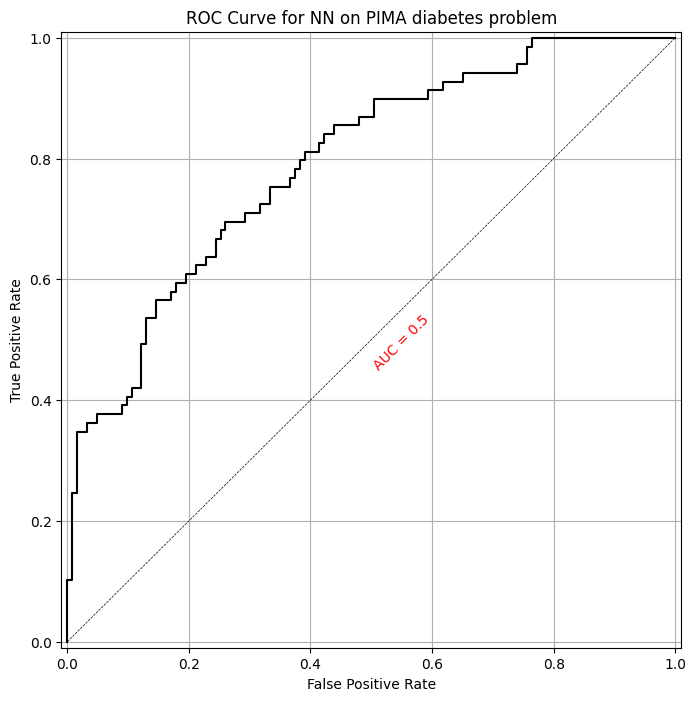

In [22]:
# Print model performance and plot ROC-AUC curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test, y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, "NN")

There may be some variation in exact numbers due to randomness, but you should get results in the same ballpark as the Random Forest - between 75% and 85% accuracy, between .8 and .9 for AUC.


Let's look at the `run_hist_1` object that was created, specifically its `history` attribute.


In [23]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Let's plot the training loss and the validation loss over the different epochs and see how it looks.


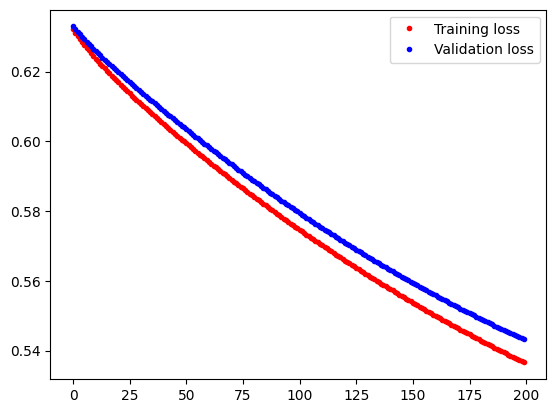

In [24]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history['loss'], 'r.', label="Training loss")
ax.plot(run_hist_1.history['val_loss'], 'b.', label="Validation loss")
ax.legend()

Looks like the losses are still going down on both the training set and the validation set.  This suggests that the model might benefit from further training.  Let's train the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.


In [25]:
## Note that when we call "fit" again, it picks up where it left off
run_hist_1b = model_1.fit(X_train_norm, y_train,
                          validation_data = (X_test_norm, y_test),
                          epochs=1000)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7173 - loss: 0.5411 - val_accuracy: 0.7448 - val_loss: 0.5429
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7203 - loss: 0.5409 - val_accuracy: 0.7448 - val_loss: 0.5426
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7409 - loss: 0.5252 - val_accuracy: 0.7448 - val_loss: 0.5423
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7276 - loss: 0.5314 - val_accuracy: 0.7448 - val_loss: 0.5420
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7261 - loss: 0.5288 - val_accuracy: 0.7448 - val_loss: 0.5417
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7260 - loss: 0.5375 - val_accuracy: 0.7448 - val_loss: 0.5414
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7418 - loss: 0.5215 - val_accuracy: 0.7448 - val_loss: 0.5412
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7490 - loss: 0.5292 - val_accuracy:

In [26]:
import json

model_1.save("model_eph_1000.keras")
with open("history_eph_1000.json", "w") as f:
    json.dump(run_hist_1b.history, f)

In [27]:
from google.colab import files
files.download("history_eph_1000.json")
files.download("model_eph_1000.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Download model and history
import json
import gdown
from keras import models


# model_url = "https://drive.google.com/uc?id=1A7ELPJVuG3Ce1VJQpgHc4guDDBW8SjuD"
# history_url = "https://drive.google.com/uc?id=1S5ml45kTZ0g3KSxIWEuPBv-D6CHXvZae"


# gdown.download(model_url, "model_eph_1000.keras", quiet=True)
# gdown.download(history_url, "history_eph_1000.json", quiet=True)

# Load model
model_1 = models.load_model("model_eph_1000.keras")

# Load result
with open("history_eph_1000.json", "r") as f:
    run_hist_1b = json.load(f)

In [29]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (496.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [30]:
n = len(run_hist_1.history['loss'])
m = len(run_hist_1b['loss'])
print(n, m)

200 1000


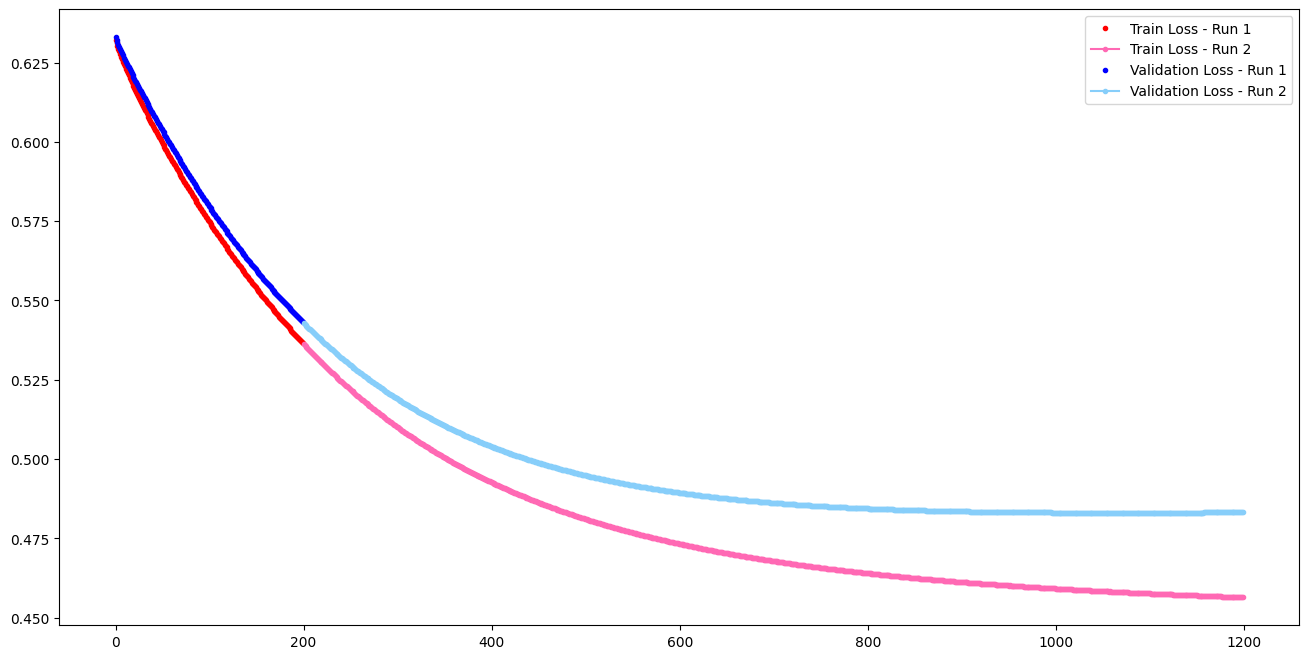

In [31]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(range(n), run_hist_1.history['loss'], 'r.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b['loss'], color='hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history['val_loss'], 'b.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b['val_loss'], color='LightSkyBlue', marker='.', label="Validation Loss - Run 2")

ax.legend()
plt.show()

Note that this graph begins where the other left off.  While the training loss is still going down, it looks like the validation loss has stabilized (or even gotten worse!).  This suggests that our network will not benefit from further training.  What is the appropriate number of epochs?


## Exercise 2
For this exercise, do the following in the cells below:
- Build a model with two hidden layers, each with 6 nodes
- Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
- Use a learning rate of .003 and train for 1500 epochs
- Graph the trajectory of the loss functions, accuracy on both train and test set
- Plot the roc curve for the predictions

Experiment with different learning rates, numbers of epochs, and network structures


In [32]:
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(8,), activation='relu'))
model_2.add(Dense(6, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate = 0.003)
model_2.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
run_hist_2 = model_2.fit(X_train_norm, y_train,
                         validation_data = (X_test_norm, y_test),
                         epochs = 1500)

Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3897 - loss: 0.7714 - val_accuracy: 0.4688 - val_loss: 0.7779
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3907 - loss: 0.7848 - val_accuracy: 0.4844 - val_loss: 0.7637
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4103 - loss: 0.7496 - val_accuracy: 0.4792 - val_loss: 0.7512
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4604 - loss: 0.7387 - val_accuracy: 0.4844 - val_loss: 0.7402
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4889 - loss: 0.7216 - val_accuracy: 0.5052 - val_loss: 0.7304
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5329 - loss: 0.7142 - val_accuracy: 0.5104 - val_loss: 0.7217
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5019 - loss: 0.7171 - val_accuracy: 0.5104 - val_loss: 0.7140
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5367 - loss: 0.7049 - val_accuracy: 0

In [33]:
save_model_history(model_2, "model_2.keras", run_hist_2, "history_2.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
mdl_id = "1RCOR7WUiJeNJUbkjNS82QF-YUCcxX-9-"
hist_id = "12hx4FpLZBg3FWeR47IIjK8EeylYqQw2A"

model_2, run_hist_2 = load_model_history(mdl_id, hist_id, "model_2.keras", "history_2.json")

In [35]:
run_hist_2.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'Accuracy over iteraions')

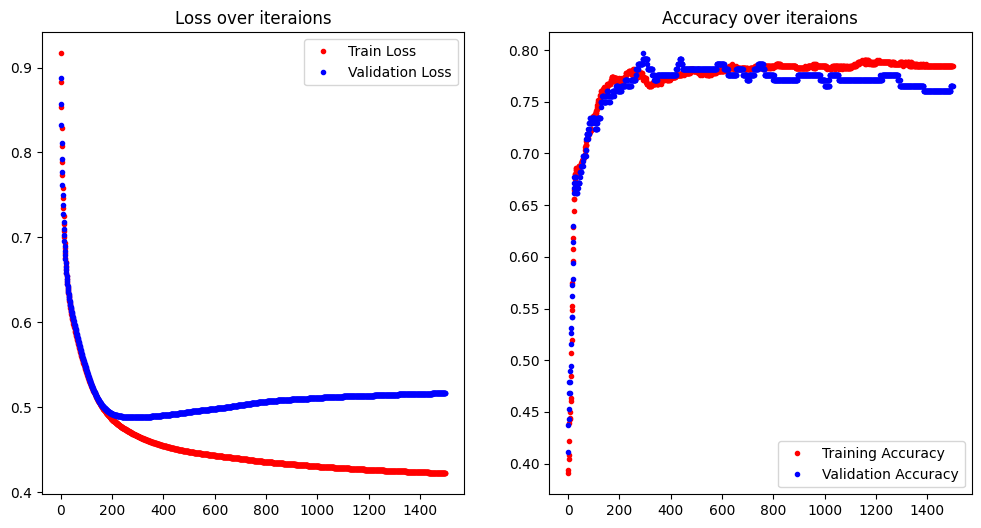

In [36]:
n = len(run_hist_2["loss"])

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.plot(range(n), run_hist_2['loss'], 'r.', label='Train Loss')
ax.plot(range(n), run_hist_2['val_loss'], 'b.', label='Validation Loss')
ax.legend()
ax.set_title("Loss over iteraions")

ax = fig.add_subplot(1,2,2)
ax.plot(range(n), run_hist_2['accuracy'], 'r.', label="Training Accuracy")
ax.plot(range(n), run_hist_2['val_accuracy'], 'b.', label="Validation Accuracy")
ax.legend(loc="lower right")
ax.set_title("Accuracy over iteraions")

In [37]:
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
y_pred_class_nn_2 = (y_pred_prob_nn_2 > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


accuracy is 0.766
roc-auc is 0.815


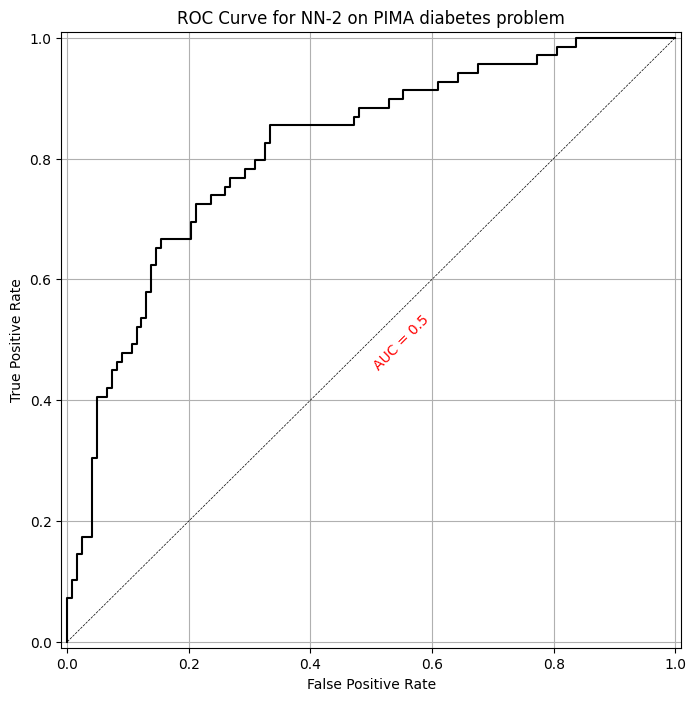

In [38]:
print("accuracy is {:.3f}".format(accuracy_score(y_test, y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_nn_2)))
plot_roc(y_test, y_pred_prob_nn_2, "NN-2")

---
### Machine Learning Foundation (C) 2020 IBM Corporation
